#### Group 3: Thuyen, Danial, Daniel, Jayson

#### Challenge

In this challenge you will implement the model described in the paper by I. Couzin,et al we discussed in class. To do so you will need to define vectors with agent positions, direction and speed. 

To update the position of the individuals, compute the direction of heading as 2 described by equations 1-3 in the paper. Read the methods carefully: There is small noise that is added to the movement in each step. Use the parameters given in the caption of Fig.1.

#### (a) Here you will examine the ability of a group to find a source of food. 

Start your simulation with food located at the origin, and place the group in a circle of radius 2 at distance 50-100 units from the food. You can start with a larger circle for largerpopulations. An informed individual in the group will move in a direction that points to the origin. To calibrate the time, first assume that all agents are informed, and strongly attracted to the food,i.e ω is large. You should see that the group reachesthe food within about 100 time units.

#### (b) Next recreate the plot in Fig 1a for populations of size 25, 50, and 100, and a different number of informed individuals. 

Use ω= 0.5, 1,and 2. Terminate the simulations when all individuals are within a radius 10 of the food (success), or the simulation ran formore than 10000s(failure). Increment the number of informed individuals in steps of approximately 5 %, starting at 5 %. Use a number of simulations in each condition to estimate the chance of success.

#### (c) Assume that the population is running away from a predator instead of finding food.

The predator starts 10 units away from the centroid of the agent population, and alwaysmoves to the closest agent, regardless of distance. If the predator comes within 0.5 units of the agent, the agent is removed from the population. In this case the vectorgipointsin the direction opposite of the predator. Assume that the speed of the predator is slightly larger than that of each agent,sp> s. Fix the population size at 25, 

#### and plot the survival time of the population as a function of the fraction of informed individuals, and the strength of interaction ω

In [9]:
class swarm:
    def __init__(self,pop,theta,dt,omega,gamma,alpha,rho,p):
        dummy=np.random.uniform(10,40,2)
        self.food=np.random.uniform(0,50,2)
        self.init_x = np.random.uniform(dummy[0]-2,dummy[0]+2,pop)
        self.init_y = np.random.uniform(dummy[1]-2,dummy[1]+2,pop)
        #self.food=np.array([10,10])  #food source at (10,10)
        #self.init_x=np.random.uniform(15-2,15+2,pop)  #swarm centroid at (15,30)
        #self.init_y=np.random.uniform(30-2,30+2,pop)
        self.aware=random.sample(range(pop),int(p*pop))
        
        self.criterion = np.ones(pop)*100
        self.time_elapsed=0
        self.theta = theta
        self.dt = dt
        self.omega=omega
        self.gamma=gamma
        self.alpha=alpha
        self.rho=rho
        self.pop=pop
        self.d=np.random.uniform(0,1,[2,pop])
        self.v=np.random.uniform(0,1,[2,pop])
        c=np.zeros([2,pop])
        c[0,:]=self.init_x
        c[1,:]=self.init_y
        self.c=c  
    
    
    # pairwise distance between bots (N by N)
    def dist(self):
        M=np.zeros([self.pop,self.pop])
        for i in range(self.pop):
            for j in range(i,self.pop):
                M[i,j]=np.linalg.norm(np.array([self.c[0,i],self.c[1,i]])- np.array([self.c[0,j],self.c[1,j]]))
        M+=M.T
        return M
    
    # distance of bot to food (1 by N)
    def dist_food(self):
        M=np.zeros(self.pop)
        for i in range(self.pop):
            M[i]=np.linalg.norm(np.array([self.c[0,i],self.c[1,i]])-self.food)
        return M

    # find bots within distance rho of current bot (identify neighbours within rho for interaction)
    def find_local_neighbor(self,M,current):
        K=M[current,:]
        return np.where((K<=self.rho)&(K>0))
    
    # (identify neighbours within alpha for avoidance)
    def avoid(self,M,current):
        K=M[current,:]
        return np.where((K<=self.alpha) & (K>0))
    
    # update bot position to avoid, join group 
    def position_update(self):
        distance=self.dist()
        for i in range(self.pop):
            #avoidance
            avoid_neighbor=self.avoid(distance,i)
            if np.shape(avoid_neighbor)[1]>0:
                dummy=np.zeros([2,np.shape(avoid_neighbor)[1]])
                for j in range(np.shape(avoid_neighbor)[1]):
                    k=avoid_neighbor[0][j]
                    dummy[:,j]=(self.c[:,k]-self.c[:,i])/np.linalg.norm((self.c[:,k]-self.c[:,i]))                
                self.d[:,i]=-np.sum(dummy,1)    
            else:
            #attraction
                neighbor=self.find_local_neighbor(distance,i)
                dummy=np.zeros([2,np.shape(neighbor)[1]])
                v_dummy=np.zeros([2,np.shape(neighbor)[1]])          
                for j in range(np.shape(neighbor)[1]):
                    k=neighbor[0][j]
                    dummy[:,j]=(self.c[:,k]-self.c[:,i])/np.linalg.norm((self.c[:,k]-self.c[:,i]))                
                    v_dummy[:,j]=self.v[:,k]/np.linalg.norm(self.v[:,k])
                self.d[:,i]=np.sum(dummy,1) + np.sum(v_dummy,1)
                if np.linalg.norm(self.d[:,i])>0:
                    dummy=self.d[:,i]/np.linalg.norm(self.d[:,i])
                else:
                    dummy=self.d[:,i]
                #dummy=self.d[:,i]/np.linalg.norm(self.d[:,i])
                self.d[:,i]=dummy
        
        #update intelligent bots preferred direction 
        for i in range(len(self.aware)):
            current=self.d[:,self.aware[i]]
            g=self.food-self.c[:,self.aware[i]]
            self.d[:,self.aware[i]]=(current+self.omega*g/np.linalg.norm(g))/np.linalg.norm(current+self.omega*g/np.linalg.norm(g))
        
        #update bot locations
        for i in range(self.pop):
            
            # compare preferred direction with current velocity to change velocity 
            angle=np.random.vonmises(0, self.gamma, 1)
            rot_mat=np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])
            dummy=np.matmul(rot_mat,self.d[:,i])
            if np. linalg.norm(self.v[:,i])>0:
                v1 = self.v[:,i] / np. linalg.norm(self.v[:,i])
            else:
                v1 = self.v[:,i]
            if  np.linalg.norm(dummy)>0:   
                v2 = dummy / np.linalg.norm(dummy)
            else:
                v2 = dummy            
            

            beta = np.arccos(np.dot(v1,v2))
            
            # update velocity
            if abs(beta)<self.theta*self.dt:
                self.v[:,i]=dummy
            else:
                angle=self.theta*self.dt
                rot_mat=np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])
                self.v[:,i]=np.matmul(rot_mat,self.d[:,i])
                
            # update position
            self.c[:,i]+= self.v[:,i]*self.dt*self.alpha 
        self.time_elapsed+=self.dt
        self.criterion=self.dist_food()

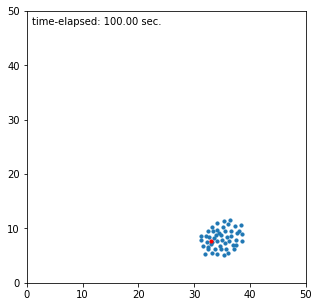

In [11]:
# animation 1 & 2

f = plt.figure(figsize=(5,5))
ax = plt.subplot(111, xlim=(0,50), ylim=(0,50))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
particles = ax.scatter([],[],s=10)

# simulate with parameters for 3a, b.
swarms = swarm(pop=50,theta=2,dt=0.2,omega=0.5,gamma=0,alpha=1,rho=6,p=1)
ax.scatter([swarms.food[0]],[swarms.food[1]],c='r',s=10)

def init():
    global swarms
    time_text.set_text('')
    particles.set_offsets(swarms.c.T)
    return particles,  

def animate(i):
    global swarms
    swarms.position_update()
    time_text.set_text('time-elapsed: %2.2f sec.' %(swarms.time_elapsed))
    particles.set_offsets(swarms.c.T)
    return particles,

ani = animation.FuncAnimation(f, animate,frames=500, blit=True,init_func=init)
ani.save('particle_swarm_try.gif', writer=animation.PillowWriter(fps=24))
plt.show()

Here we have a simulation where every bot is informed (p=1) and the social interaction weight is $\omega=0.5$. (Note that as $\omega$ increases, so does the desire of the informed bots to move towards the informed destination.) 

In [ ]:
omega_set = [0.5,1,2]
pop_set = [25, 50, 100]
p_set = np.array([0.5,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
repeats=30
tf=50
S1=np.zeros([len(pop_set),len(p_set)])  #success_rate for omega=0.5
for i in range(len(pop_set)):
    for j in range(len(p_set)):
        temp=0
        for k in range(repeats):
            swarms=swarm(pop=pop_set[i],theta=2,dt=0.2,omega=omega_set[0],gamma=0,alpha=1,rho=6,p=p_set[j])
            while np.max(swarms.criterion)>10 and swarms.time_elapsed<tf:
                swarms.position_update()
            if swarms.time_elapsed>=tf:
                temp+=1
        S1[i,j]=(repeats-temp)/repeats
print('omega 1 complete')
        
S2=np.zeros([len(pop_set),len(p_set)])  #success_rate for omega=1
for i in range(len(pop_set)):
    for j in range(len(p_set)):
        temp=0
        for k in range(repeats):
            swarms=swarm(pop=pop_set[i],theta=2,dt=0.2,omega=omega_set[1],gamma=0,alpha=1,rho=6,p=p_set[j])
            while np.max(swarms.criterion)>10 and swarms.time_elapsed<tf:
                swarms.position_update()
            if swarms.time_elapsed>=tf:
                temp+=1
        S2[i,j]=(repeats-temp)/repeats
print('omega 2 complete')

S3=np.zeros([len(pop_set),len(p_set)])  #success_rate for omega=2
for i in range(len(pop_set)):
    for j in range(len(p_set)):
        temp=0
        for k in range(repeats):
            swarms=swarm(pop=pop_set[i],theta=2,dt=0.2,omega=omega_set[2],gamma=0,alpha=1,rho=6,p=p_set[j])
            while np.max(swarms.criterion)>10 and swarms.time_elapsed<tf:
                swarms.position_update()
            if swarms.time_elapsed>=tf:
                temp+=1
        S3[i,j]=(repeats-temp)/repeats
print('omega 3 complete')

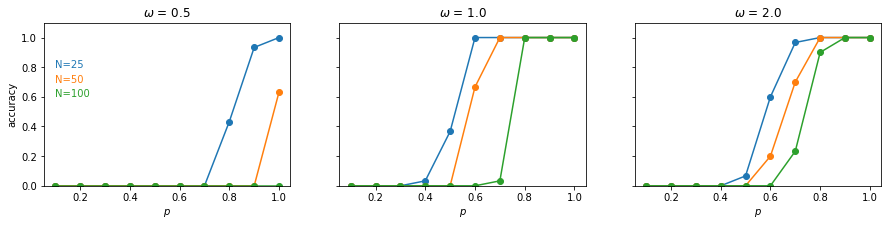

In [12]:
import pandas as pd 
pd_omega1=pd.read_csv("omega1.csv")
S1= pd_omega1.values
pd_omega2=pd.read_csv("omega2.csv")
S2= pd_omega2.values
pd_omega3=pd.read_csv("omega3.csv")
S3= pd_omega3.values
omega_set = [0.5,1,2]
pop_set = [25, 50, 100]
p_set = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
f,axes= plt.subplots(1,3,figsize=(15,3))
for i in range(len(pop_set)):
    axes[0].plot(p_set,S1[i,:],'-o')
    axes[1].plot(p_set,S2[i,:],'-o')
    axes[2].plot(p_set,S3[i,:],'-o')
for i in range(len(omega_set)):
    axes[i].set_title(r'$\omega$ = %1.1f' %(omega_set[i]))
    axes[i].set_ylim([0,1.1])
    axes[i].set_xlabel(r'$p$')
for i in range(1,3):
    axes[i].set_yticklabels([])
axes[0].set_ylabel('accuracy')
axes[0].text(0.1,0.8,'N=25',color='C0')
axes[0].text(0.1,0.7,'N=50',color='C1')
axes[0].text(0.1,0.6,'N=100',color='C2')
plt.show()

A simulation is successful if each of the bots was able to move to within a specified distance from the target destination within a specified time frame. Accuracy is measured by how often the simulation is successful. In the simulations, the target destination is always set at (10,10) and the centroid of the swarm of bots is set at (15,30). Here, time limit is 50 sec. and the required distance from the target is 10 units. A single simulation for a parameter combination takes around 3 minutes to complete. Thirty (30) simulations were done for each parameter combination.     

In [13]:
class swarm_predator:
    
    # introduce parameters alpha_p - speed of predator
    # account for dead population
    
    def __init__(self,pop,theta,dt,omega,gamma,alpha,alpha_p,rho,p):
        self.aware=random.sample(range(pop),int(p*pop))
        dummy=np.random.uniform(10,40,2)
        self.init_x = np.random.uniform(dummy[0]-2,dummy[0]+2,pop)
        self.init_y = np.random.uniform(dummy[1]-2,dummy[1]+2,pop)
        p_x = np.random.uniform(dummy[0]-10,dummy[0]+10,1)
        p_y = dummy[1]+np.sqrt(100-(p_x-dummy[0])**2)
        self.predator = np.array([p_x,p_y]) 
        self.criterion = np.ones(pop)*100
        self.time_elapsed=0
        self.theta = theta
        self.dt = dt
        self.omega=omega
        self.gamma=gamma
        self.alpha=1
        self.alpha_p=alpha_p
        self.rho=rho
        self.pop=pop
        self.d=np.random.uniform(0,1,[2,pop])
        self.v=np.random.uniform(0,1,[2,pop])
        c=np.zeros([2,pop])
        c[0,:]=self.init_x
        c[1,:]=self.init_y
        self.c=c  
        self.dead=[]
    
    # pairwise distance between bots
    def dist(self):
        M=np.zeros([self.pop,self.pop])
        for i in range(self.pop):
            for j in range(i,self.pop):
                M[i,j]=np.linalg.norm(np.array([self.c[0,i],self.c[1,i]])- np.array([self.c[0,j],self.c[1,j]]))
        M+=M.T
        return M
    
    # bot-predator distance
    def dist_predator(self):
        M=np.zeros(self.pop)
        for i in range(self.pop):
            M[i]=np.linalg.norm(self.c[:,i]-self.predator.reshape(2))
        return M
    
    # find local neighbor
    def find_local_neighbor(self,M,current):
        K=M[current,:]
        return np.where((K<=self.rho)&(K>0))
    
    # determine bots to avoid
    def avoid(self,M,current):
        K=M[current,:]
        return np.where((K<=self.alpha) & (K>0))
     
    # update position
    def position_update(self):
        distance=self.dist()
        for i in range(self.pop):
            if i not in self.dead and len(self.dead)<self.pop-1:
                #avoidance
                avoid_neighbor=self.avoid(distance,i)
                if np.shape(avoid_neighbor)[1]>0:
                    dummy=np.zeros([2,np.shape(avoid_neighbor)[1]])
                    for j in range(np.shape(avoid_neighbor)[1]):
                        k=avoid_neighbor[0][j]
                        dummy[:,j]=(self.c[:,k]-self.c[:,i])/np.linalg.norm((self.c[:,k]-self.c[:,i]))                
                    self.d[:,i]=-np.sum(dummy,1)    
                else:
                #attraction
                    neighbor=self.find_local_neighbor(distance,i)
                    dummy=np.zeros([2,np.shape(neighbor)[1]])
                    v_dummy=np.zeros([2,np.shape(neighbor)[1]])          
                    for j in range(np.shape(neighbor)[1]):
                        k=neighbor[0][j]
                        dummy[:,j]=(self.c[:,k]-self.c[:,i])/np.linalg.norm((self.c[:,k]-self.c[:,i]))                
                        v_dummy[:,j]=self.v[:,k]/np.linalg.norm(self.v[:,k])
                    self.d[:,i]=np.sum(dummy,1) + np.sum(v_dummy,1)
                if np.linalg.norm(self.d[:,i])>0:
                    dummy=self.d[:,i]/np.linalg.norm(self.d[:,i])
                else:
                    dummy=self.d[:,i]
                self.d[:,i]=dummy
        
        #update intelligent bots preferred direction 
        for i in range(len(self.aware)):
            if self.aware[i] not in self.dead:
                current=self.d[:,self.aware[i]].reshape([2,1])
                g=-(self.predator-self.c[:,self.aware[i]].reshape([2,1]))
                self.d[:,self.aware[i]]=((current+self.omega*g/np.linalg.norm(g))/np.linalg.norm(current+self.omega*g/np.linalg.norm(g))).reshape(2)

        #update bot locations
        for i in range(self.pop):
            if i not in self.dead:
                angle=np.random.vonmises(0, self.gamma, 1)
                rot_mat=np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])
                dummy=np.matmul(rot_mat,self.d[:,i])
                if np. linalg.norm(self.v[:,i])>0:
                    v1 = self.v[:,i] / np. linalg.norm(self.v[:,i])
                else:
                    v1 = self.v[:,i]
                if  np.linalg.norm(dummy)>0:   
                    v2 = dummy / np.linalg.norm(dummy)
                else:
                    v2 = dummy
                beta = np.arccos(np.dot(v1,v2))
                if abs(beta)<self.theta*self.dt:
                    self.v[:,i]=dummy
                else:
                    angle=self.theta*self.dt
                    rot_mat=np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])
                    self.v[:,i]=np.matmul(rot_mat,self.d[:,i])
                #self.v[:,i]=self.d[:,i]
                self.c[:,i]+= self.v[:,i]*self.dt*self.alpha 

        # update predator location
        if len(self.dead)<self.pop:
            index=np.argmin(self.dist_predator())
            dummy=(self.c[:,index]-self.predator.reshape(2))/np.linalg.norm(self.c[:,index]-self.predator.reshape(2))
            self.predator+=dummy.reshape([2,1])*self.dt*self.alpha_p            
        
        # perform predation step and denote index
        prey=np.where(self.dist_predator()<0.5)[0]
        if len(prey)>0:
            index=np.min(prey)
            self.c[:,index]=[-10000,-10000]
            self.dead.append(index)
            
        # determine remaining bots  
        self.survive=len(np.where(self.c[0,:]>-10000)[0])    
        
        self.time_elapsed+=self.dt
        #self.criterion=self.dist_food()

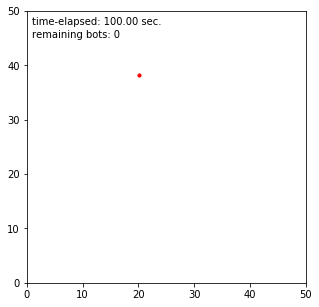

In [19]:
# animation

f = plt.figure(figsize=(5,5))
ax = plt.subplot(111, xlim=(0,50), ylim=(0,50))
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
survive_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

particles = ax.scatter([],[],s=10)
pred = ax.scatter([],[],s=10,color='r')

# sim. with parameters (predator is just 10 percent faster)
swarms = swarm_predator(pop=50,theta=2,dt=0.2,omega=0.5,gamma=0,alpha=1,alpha_p=1.1,rho=6,p=0.9)

def init():
    global swarms
    time_text.set_text('')
    survive_text.set_text('')
    particles.set_offsets(swarms.c.T)
    pred.set_offsets(swarms.predator.T)
    return particles,  

def animate(i):
    global swarms, mat
    swarms.position_update()
    time_text.set_text('time-elapsed: %2.2f sec.' %(swarms.time_elapsed))
    survive_text.set_text('remaining bots: %d' %(swarms.survive))
    particles.set_offsets(swarms.c.T)
    pred.set_offsets(swarms.predator.T)
    return particles,

ani = animation.FuncAnimation(f, animate,frames=500, blit=True,init_func=init)
ani.save('particle_swarm_predation_try.gif', writer=animation.PillowWriter(fps=24))
plt.show()

Here we show a simulation where a single predator is placed 10 units away from the centroid of the swarm. Informed bots move away from the predator. A bot is taken out of the simulation when the predator is at least 0.5 units away. In case of multiple possible bots satisfying this, the bot closest to the predator dies. In this simulation, 90% of the bots are informed, bot speed is 1 unit/s, and predator speed is 1.1 units/s.

In [ ]:
# result showing survival time

omega_set=np.linspace(0.1,1,10)
p_set=np.linspace(0.1,1,10)
S=np.zeros([len(omega_set),len(p_set)])
repeats=10
for i in range(len(omega_set)):
    for j in range(len(p_set)):
        temp=0
        for k in range(repeats):
            swarms=swarm_predator(pop=25,theta=2,dt=0.2,omega=omega_set[i],gamma=0,alpha=1,alpha_p=2,rho=6,p=p_set[j])
            while len(swarms.dead)<swarms.pop:
                swarms.position_update()
            temp+=swarms.time_elapsed    
        S[i,j]=temp/repeats

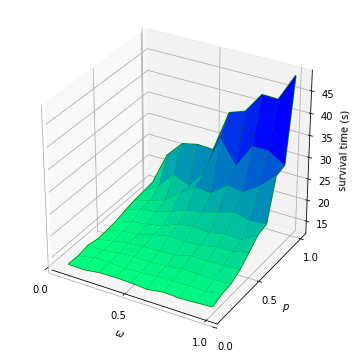

In [16]:
import pandas as pd 
pd_S=pd.read_csv("Survival.csv")
S= pd_S.values
from mpl_toolkits import mplot3d
omega_set=np.linspace(0.1,1,10)          #omega values considered
p_set=np.linspace(0.1,1,10)              #p values considered   
X,Y = np.meshgrid(omega_set,p_set)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection="3d")
ax.set_xticks(np.linspace(0,1,3))
ax.set_yticks(np.linspace(0,1,3))
ax.plot_wireframe(X, Y, S, color='green')
ax.plot_surface(X, Y, S, rstride=1, cstride=1,cmap='winter_r', edgecolor='none')
ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$p$')
ax.set_zlabel('survival time (s)')
plt.tight_layout()  

Here we show the average survival time of the swarm of bots when there is a single predator whose speed is higher than its prey. Here bots have speed 1 unit/s while the predator has speed 2 units/s. Ten (10) simulations were performed for each parameter combination.  